<a href="https://colab.research.google.com/github/Arijeet-Mahanty/NHANES_Dataset_Observation/blob/main/Data_Science_Minor_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Python Libraries and Setting Up data

In [ ]:
# Importing necessary python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis

# Loading the google drive into the project to access datasets.

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Initial definition of column names for both datasets
columns_name = ['Weight (kg)', 'Standing Height (cm)', 'Upper Arm Length (cm)',
    'Upper Leg Length (cm)', 'Arm Circumference (cm)', 'Hip Circumference (cm)', 'Waist Circumference (cm)']

# Creating data frames for the given datasets.

# Loading data into variables using the correct separator (',') and ignoring comments ('#').
dataf = pd.read_csv('/content/nhanes_adult_female_bmx_2020.csv', sep =',', comment='#', header=None)
datam = pd.read_csv('/content/nhanes_adult_male_bmx_2020.csv', sep = ',', comment='#', header=None)

# Assign the column names
dataf.columns = columns_name
datam.columns = columns_name

# Convert all columns to numeric.

dataf = dataf.apply(pd.to_numeric, errors='coerce')
datam = datam.apply(pd.to_numeric, errors='coerce')

# Checking if the data loaded correctly or not.
print("Data Set 1:")
print(dataf.head(10))

print("\nData Set 2:")
print(datam.head(10))

Data Set 1:
   Weight (kg)  Standing Height (cm)  Upper Arm Length (cm)  \
0          NaN                   NaN                    NaN   
1         97.1                 160.2                   34.7   
2         91.1                 152.7                   33.5   
3         73.0                 161.2                   37.4   
4         61.7                 157.4                   38.0   
5         55.4                 154.6                   34.6   
6         62.0                 144.7                   32.5   
7         66.2                 166.5                   37.5   
8         75.9                 154.5                   35.4   
9         77.2                 159.2                   38.5   

   Upper Leg Length (cm)  Arm Circumference (cm)  Hip Circumference (cm)  \
0                    NaN                     NaN                     NaN   
1                   40.8                    35.8                   126.1   
2                   33.0                    38.5                  

In [ ]:
print(datam.shape)
print(datam.info())
print(datam.dtypes)
print(datam.isnull().sum())


print('\n',dataf.shape)
print(dataf.info())
print(dataf.dtypes)
print(dataf.isnull().sum())

(4082, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4082 entries, 0 to 4081
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Weight (kg)               4081 non-null   float64
 1   Standing Height (cm)      4081 non-null   float64
 2   Upper Arm Length (cm)     4081 non-null   float64
 3   Upper Leg Length (cm)     4081 non-null   float64
 4   Arm Circumference (cm)    4081 non-null   float64
 5   Hip Circumference (cm)    4081 non-null   float64
 6   Waist Circumference (cm)  4081 non-null   float64
dtypes: float64(7)
memory usage: 223.4 KB
None
Weight (kg)                 float64
Standing Height (cm)        float64
Upper Arm Length (cm)       float64
Upper Leg Length (cm)       float64
Arm Circumference (cm)      float64
Hip Circumference (cm)      float64
Waist Circumference (cm)    float64
dtype: object
Weight (kg)                 1
Standing Height (cm)        1
Upper Arm Length

### Initial Observations


 1. There are two datasets that are being observed here and both of them contains information about body measurements of adult males and females.

 2. The male dataset consists of 4082 rows and 7 columns which means it has a total of 4082 entries out of which none are null.

 3. The female dataset consists of 4222 rows and 7 columns which means it has 4222 entries out of which none are null.

 4. The above observations are made after converting the data into numeric values and the non-convertable values are simply made NaN

### 2. Read the two files as numpy matrices named male and female. Each matrix consists of seven columns:
1. weight (kg),
2. standing height (cm),
3. upper arm length (cm),
4. upper leg length (cm),
5. arm circumference (cm),
6. hip circumference (cm),
7. waist circumference (cm)


In [ ]:
# Creating numpy matrices directly from the correctly loaded and named DataFrames.
male = datam.to_numpy()
female = dataf.to_numpy()

# Checking the shape of the matrices
print("\n Shape of the male matrix : ", male.shape)
print("\n Shape of the female matrix : ", female.shape)



 Shape of the male matrix :  (4082, 7)

 Shape of the female matrix :  (4222, 7)


### 3. On a single plot (use matplotlib.pytplot.subplot), draw two histograms: for female

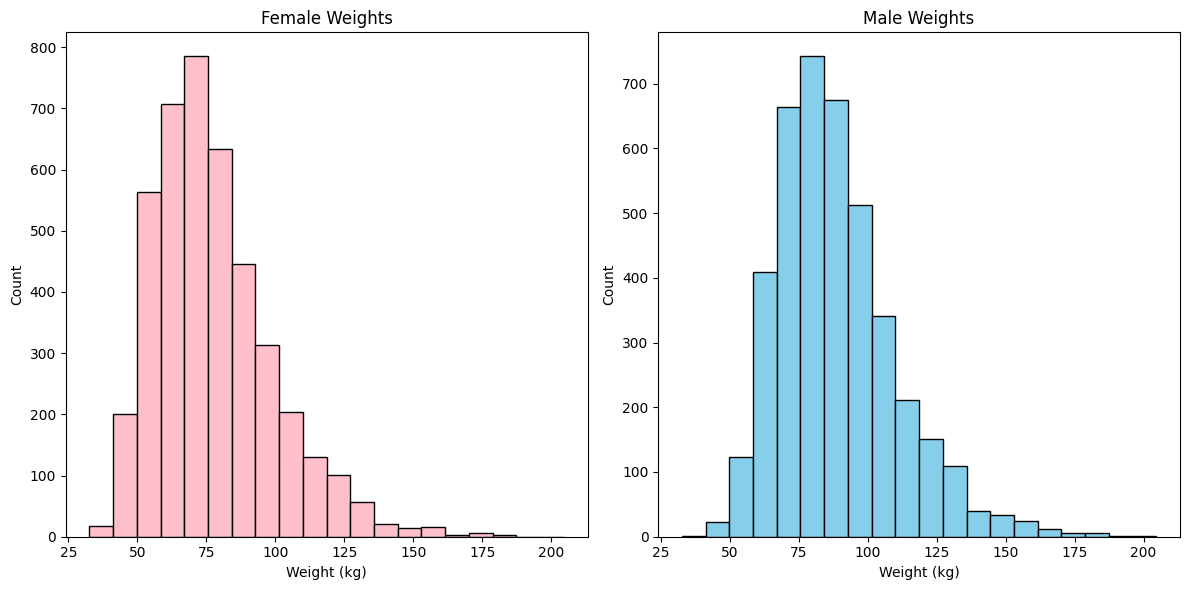

In [ ]:
# Extracting the weight column
weight_male = male[:,0]
weight_female = female[:,0]

# Dropping any NaN values that might have resulted from 'coerce'.

weight_male = weight_male[~np.isnan(weight_male)]
weight_female = weight_female[~np.isnan(weight_female)]

# Setting up the minimum and maximum limits for consistent plotting ranges
min_lim = min(weight_male.min(), weight_female.min())
max_lim = max(weight_male.max(), weight_female.max())


# Creating the plot
plt.figure(figsize=(12,6)) # Increased figure size for better readability

# Top Subfigure Female Weights
plt.subplot(1,2,1)
plt.hist(weight_female, bins=20, color='pink', edgecolor='black', range=(min_lim, max_lim))
plt.title('Female Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Count')

# Bottom Subfigure Male Weights
plt.subplot(1,2,2)
plt.hist(weight_male, bins=20, color='skyblue', edgecolor='black', range=(min_lim, max_lim))
plt.title('Male Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Count')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()


### 4. Draw a box-and-whisker plot, with two boxes side by side, giving the male and female weights so that they can be compared to each other.

Text(0, 0.5, 'Count')

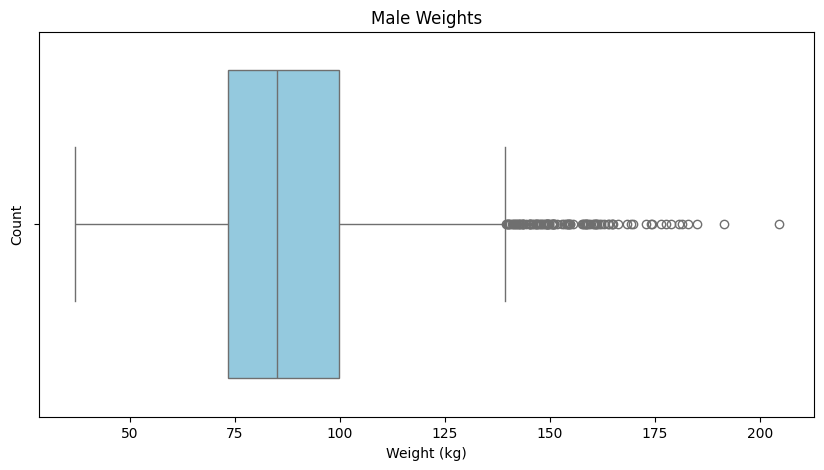

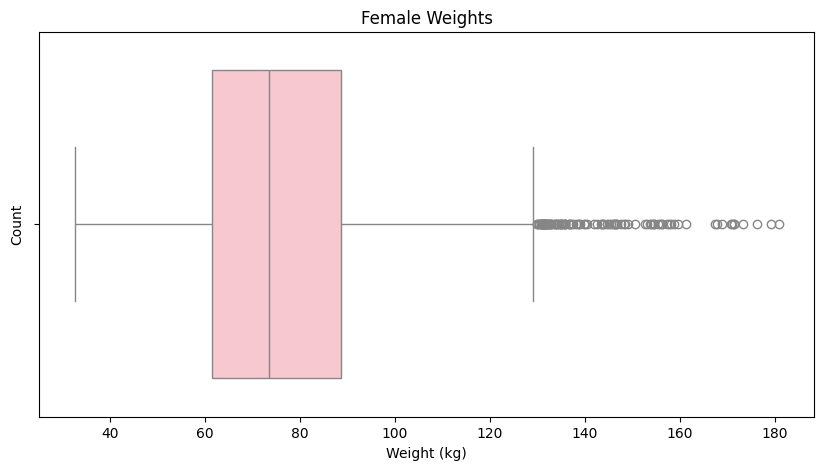

In [ ]:
plt.figure(figsize=(10,5))
# Creating the boxplot for male weights using seaborn library.
sns.boxplot(x=weight_male,color="skyblue")
plt.title('Male Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Count')

plt.figure(figsize=(10,5))
# Creating the boxplot for femal weights using seaborn library.
sns.boxplot(x=weight_female,color="pink")
plt.title('Female Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Count')

### Observation for Males

1. The distribution is right-skewed (positively skewed). This means that while most men fall within a standard weight range (the box), there is a significant tail of individuals with much higher weights pulling the distribution to the right.

2. There are many men with weights significantly above the "normal" upper limit (statistically defined as Q3 + 1.5 * IQR where IQR stands for Inter Quartile Range). There are virtually no outliers on the lower end, suggesting there are very few underweight men in this dataset compared to overweight ones.

3. Because of the heavy outliers on the right, the Mean (Average) will be higher than the Median.

4. The "whiskers" (the horizontal lines coming out of the box) are unequal. The right whisker is longer than the left whisker. The data is more spread out among heavier men. The weights of the lighter 50% of men (left side) are more consistent and clustered closer together than the weights of the heavier 50% of men.

### Observation for Females

1. There is a very long "tail" of data points extending to the right side (towards the higher weights).This indicates a positive skew. While the majority of women cluster around the median (the center), the average (mean) is being pulled higher by the individuals with heavier weights.

2. There is a dense cluster of empty circles (outliers) starting around the 130kg mark and extending all the way up to roughly 180kg.There is a significant subset of the population with weights well above the "typical" range. Interestingly, visually comparing this to the male plot, the female outliers seem to extend just as far, if not farther, than the male outliers.

3. Looking at the vertical line inside the pink box (the Median). It aligns roughly with the 70-75kg mark on the x-axis.Comparing this to our male plot (where the median was near 80kg), the central tendency for females is clearly lower.

4. The "middle 50%" of women have a fairly wide range of weights. The variation is not small; there is a significant difference between a woman at the 25th percentile and a woman at the 75th percentile.

### 5. Compute the basic numerical aggregates of the male and female weights. In your own words, describe and compare the two distributions

In [ ]:
# Function to get the statistical values for both the groups.

def get_stats(data, name):
    return {
        'Group': name,
        'Mean': np.mean(data),
        'Median': np.median(data),
        'Std Dev': np.std(data),
        'Range': np.max(data) - np.min(data),
        'Skewness': skew(data),
        'Kurtosis': kurtosis(data)
    }
# Running the function for both the groups with the already prepared numeric data.
stats_male = get_stats(weight_male, 'Male')
stats_female = get_stats(weight_female, 'Female')

# Creating a DataFrame to display it
df_stats = pd.DataFrame([stats_male, stats_female])
display(df_stats)

,Group,Mean,Median,Std Dev,Range,Skewness,Kurtosis
0,Male,88.364543,85.0,21.418937,167.8,0.984281,1.474288
1,Female,77.403791,73.6,21.542508,148.3,1.033361,1.400968


1. The male group has a higher mean weight (88.36 kg) compared to the female group (77.40 kg). This confirms that, on average, the males in this sample are heavier.

2. The Standard Deviation for males is slightly lower than for females. This indicates that male weights have more dispersion—meaning there is a wider gap between the lightest and heaviest men, whereas the female weights are more clustered around the average.

3. Both the distributions are right-skewed (positively skewed). This means the 'tail' extends to the right, indicating there are a few individuals with unusually high weights pulling the average up.

### 6. To the female matrix, add the eight column which gives the body mass indices of all the female participants.

In [ ]:
# Extracting the weight and height data
weights_kg = female[:, 0]
heights_cm = female[:, 1]

# Converting heights to meters
height_m = heights_cm/100

# Calculating the BMI
bmi = weights_kg/(height_m**2)

# Adding eight column of BMI to the female matrix
female_with_bmi = np.column_stack((female, bmi))

# Checking if the new column is added.
print(f"Original Shape: {female.shape}")
print(f"New Shape:      {female_with_bmi.shape}")


Original Shape: (4222, 7)
New Shape:      (4222, 8)


### 7. Create a new matrix zfemale being a version of the female dataset with all its columns standardised (by computing the z-scores of each column).

In [ ]:
# Ensure female_with_bmi exists and contains BMI

# First we need to remove rows with NaNs from female_with_bmi to ensure clean data for z-scoring.
# This handles any NaNs from the original data and the BMI calculation itself.
female_cleaned_for_zscore = female_with_bmi[~np.isnan(female_with_bmi).any(axis=1)]

# Calculating z-scores on the cleaned matrix with BMI.
zfemale = stats.zscore(female_cleaned_for_zscore, axis=0)

print("Original Female Matrix Shape (without BMI):", female.shape)
print("Female Matrix with BMI (before cleaning): ", female_with_bmi.shape)
print("Female Matrix with BMI (after cleaning for z-score): ", female_cleaned_for_zscore.shape)
print("Z-Matrix Shape (now includes BMI and is clean): ", zfemale.shape)

# Now, these means/stds should be close to 0/1, as NaNs are handled.
# Accessing column 0 for example:
print("Mean of first column (approx 0):", np.mean(zfemale[:, 0]))
print("Std of first column (approx 1): ", np.std(zfemale[:, 0]))

Original Female Matrix Shape (without BMI): (4222, 11)
Female Matrix with BMI (before cleaning):  (4222, 8)
Female Matrix with BMI (after cleaning for z-score):  (4221, 8)
Z-Matrix Shape (now includes BMI and is clean):  (4221, 8)
Mean of first column (approx 0): 6.393369605346744e-15
Std of first column (approx 1):  1.0000000000000022


### 8.Draw a scatterplot matrix (pairplot) for the standardised versions of height, weight,waist circumference, hip circumference, and BMI of the females. Compute Pearson’s and Spearman’s correlation coefficients for all pairs of variables.Interpret the obtained results.



Check for NaNs in Z-matrix (Should be 0):
Height    0
Weight    0
Waist     0
Hip       0
BMI       0
dtype: int64


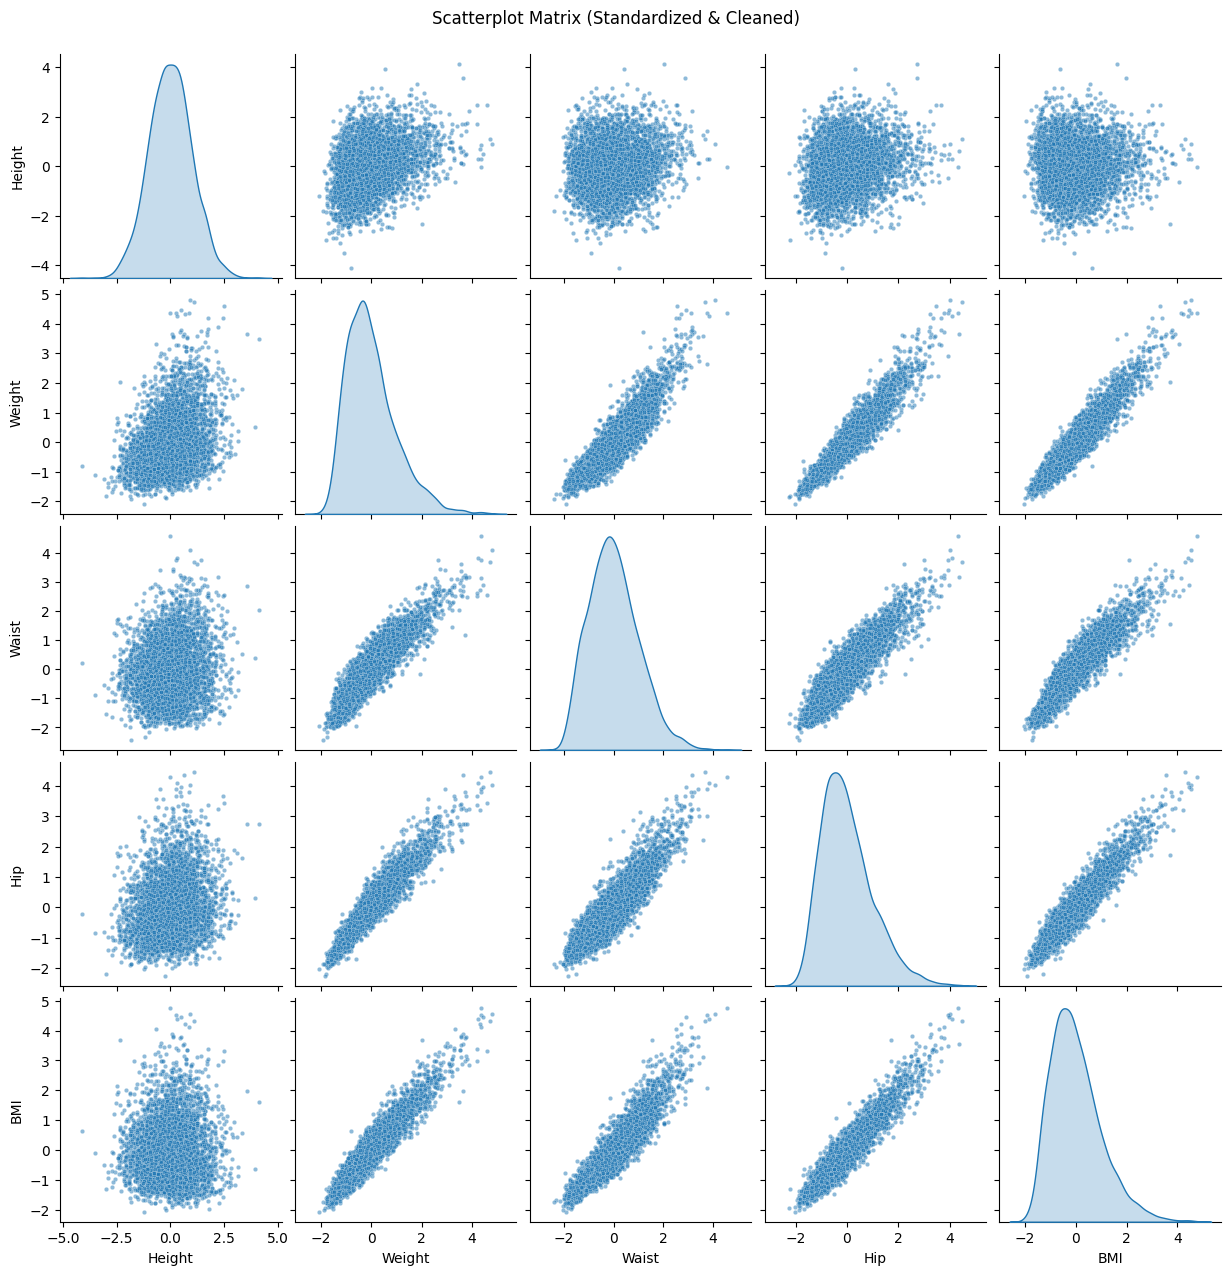


--- Pearson Correlation ---


,Height,Weight,Waist,Hip,BMI
Height,1.000000,0.345496,0.126547,0.202895,0.033077
Weight,0.345496,1.000000,0.904550,0.946553,0.945900
Waist,0.126547,0.904550,1.000000,0.897407,0.921198
Hip,0.202895,0.946553,0.897407,1.000000,0.944199
BMI,0.033077,0.945900,0.921198,0.944199,1.000000



--- Spearman Correlation ---


,Height,Weight,Waist,Hip,BMI
Height,1.000000,0.338860,0.108587,0.205405,0.019897
Weight,0.338860,1.000000,0.900169,0.946634,0.937999
Waist,0.108587,0.900169,1.000000,0.888037,0.923114
Hip,0.205405,0.946634,0.888037,1.000000,0.934196
BMI,0.019897,0.937999,0.923114,0.934196,1.000000


In [ ]:
# Cleaning the data to avoid errors by dropping columns
df_clean = dataf.apply(pd.to_numeric, errors='coerce').dropna()


weights_kg = df_clean.iloc[:, 0].values
heights_cm = df_clean.iloc[:, 1].values
waist_cm   = df_clean.iloc[:, 6].values
hip_cm     = df_clean.iloc[:, 5].values

# Convert to meters
heights_m = heights_cm / 100
# Filter out any rows where height is 0 to avoid Infinity
mask_valid_height = heights_m > 0
# Apply filter to ALL arrays
weights_kg = weights_kg[mask_valid_height]
heights_m = heights_m[mask_valid_height]
waist_cm = waist_cm[mask_valid_height]
hip_cm = hip_cm[mask_valid_height]

# Calculating BMI
bmi = weights_kg / (heights_m ** 2)

# 4. Creating the DataFrame for Analysis
data = {
    'Height': heights_m,
    'Weight': weights_kg,
    'Waist': waist_cm,
    'Hip': hip_cm,
    'BMI': bmi
}
df_analysis = pd.DataFrame(data)

# Standardize (Z-Score)
df_z = df_analysis.apply(stats.zscore)

print("Check for NaNs in Z-matrix (Should be 0):")
print(df_z.isnull().sum())


# Scatterplot Matrix
sns.pairplot(df_z, plot_kws={'alpha': 0.5, 's': 10}, diag_kind='kde')
plt.suptitle('Scatterplot Matrix (Standardized & Cleaned)', y=1.02)
plt.show()

# Correlations
print("\n--- Pearson Correlation ---")
display(df_z.corr(method='pearson'))

print("\n--- Spearman Correlation ---")
display(df_z.corr(method='spearman'))

### 9. Compute the waist circumference to height ratio and the waist circumference to hip ,circumference ratio of the male and female participants by adding two more columns to the males and females matrices.

In [ ]:
def add_health_ratios(matrix, name):

   # Extracting the columns
    height_cm = matrix[:, 1]
    hip_cm    = matrix[:, 5]
    waist_cm  = matrix[:, 6]

  # Calculating the Ratios

    # Waist-to-Height Ratio
    whtr = waist_cm / height_cm

    # Waist-to-Hip Ratio
    whr = waist_cm / hip_cm

    # Stacking in the end of the matrix
    # We need to reshape them to be columns (N, 1) before stacking
    new_cols = np.column_stack((whtr, whr))
    updated_matrix = np.hstack((matrix, new_cols))

    print(f"--- {name} Matrix ---")
    print(f"Old Shape: {matrix.shape}")
    print(f"New Shape: {updated_matrix.shape}")
    print(f"Last 2 values of first row: {updated_matrix[0, -2:]}\n")

    return updated_matrix

# Apply to both matrices
male = add_health_ratios(male, "Male")
female = add_health_ratios(female, "Female")

--- Male Matrix ---
Old Shape: (4082, 9)
New Shape: (4082, 11)
Last 2 values of first row: [nan nan]

--- Female Matrix ---
Old Shape: (4222, 9)
New Shape: (4222, 11)
Last 2 values of first row: [nan nan]



### 10. Draw a box-and-whisker plot with four boxes side by side, comparing the distributionof the waist-to-height ratio and the waist-to-hip ratio of both male and female participants.Explain what you see.

Male samples ready for WHtR: 4081
Female samples ready for WHtR: 4221
Male samples ready for WHR: 4081
Female samples ready for WHR: 4221


/tmp/ipython-input-1478967207.py:52: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot = plt.boxplot(plot_data, labels=plot_labels, patch_artist=True)


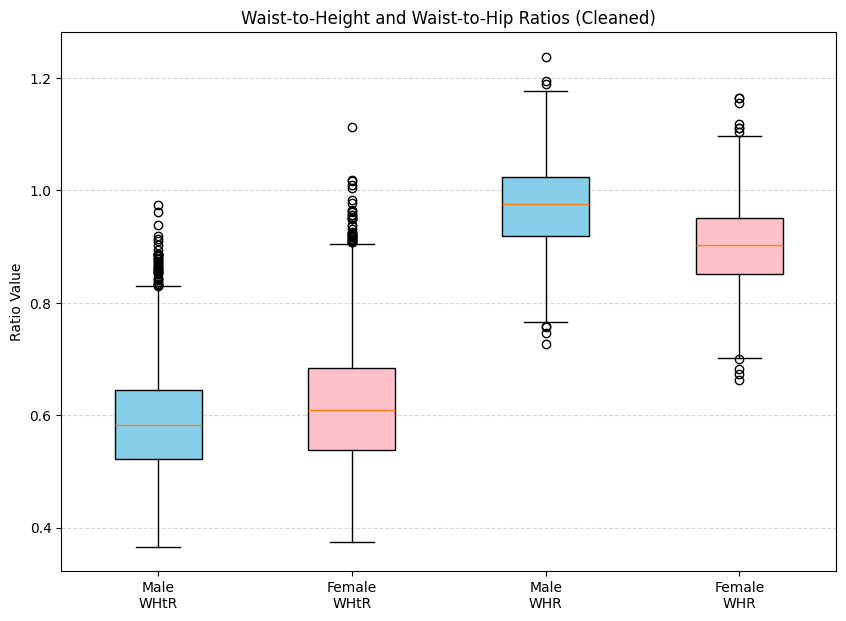

In [ ]:
df_m = pd.read_csv('/content/nhanes_adult_male_bmx_2020.csv', sep = ',', comment='#', header=None)
df_f = pd.read_csv('/content/nhanes_adult_female_bmx_2020.csv', sep = ',', comment='#', header=None)

columns_name = ['Weight (kg)', 'Standing Height (cm)', 'Upper Arm Length (cm)',
    'Upper Leg Length (cm)', 'Arm Circumference (cm)', 'Hip Circumference (cm)', 'Waist Circumference (cm)']
df_m.columns = columns_name
df_f.columns = columns_name

# Cleaning the data
def clean_and_extract(df):

    relevant_cols_for_ratios = ['Standing Height (cm)', 'Hip Circumference (cm)', 'Waist Circumference (cm)']
    df_clean = df[relevant_cols_for_ratios].apply(pd.to_numeric, errors='coerce').dropna()

    # Extracting arrays from the cleaned DataFrame
    height = df_clean['Standing Height (cm)'].values
    hip = df_clean['Hip Circumference (cm)'].values
    waist = df_clean['Waist Circumference (cm)'].values
    return height, hip, waist

m_h, m_hip, m_waist = clean_and_extract(df_m)
f_h, f_hip, f_waist = clean_and_extract(df_f)

# Calculating Ratios (Avoid Division by Zero and NaNs)
# Waist-to-Height
with np.errstate(divide='ignore', invalid='ignore'):
    m_whtr = np.where(m_h != 0, m_waist / m_h, np.nan)
    f_whtr = np.where(f_h != 0, f_waist / f_h, np.nan)

# Waist-to-Hip
with np.errstate(divide='ignore', invalid='ignore'):
    m_whr = np.where(m_hip != 0, m_waist / m_hip, np.nan)
    f_whr = np.where(f_hip != 0, f_waist / f_hip, np.nan)

# Remove any NaN or infinite values that may result from division by zero or other issues
m_whtr = m_whtr[np.isfinite(m_whtr)]
f_whtr = f_whtr[np.isfinite(f_whtr)]
m_whr = m_whr[np.isfinite(m_whr)]
f_whr = f_whr[np.isfinite(f_whr)]

# 4. Checking if data exists or not
print(f"Male samples ready for WHtR: {len(m_whtr)}")
print(f"Female samples ready for WHtR: {len(f_whtr)}")
print(f"Male samples ready for WHR: {len(m_whr)}")
print(f"Female samples ready for WHR: {len(f_whr)}")

# 5. Plotting boxplot
plot_data = [m_whtr, f_whtr, m_whr, f_whr]
plot_labels = ['Male\nWHtR', 'Female\nWHtR', 'Male\nWHR', 'Female\nWHR']

plt.figure(figsize=(10, 7))
bplot = plt.boxplot(plot_data, labels=plot_labels, patch_artist=True)

# Adding colors to the boxplot
colors = ['skyblue', 'pink', 'skyblue', 'pink']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Waist-to-Height and Waist-to-Hip Ratios (Cleaned)')
plt.ylabel('Ratio Value')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


### Observations based on the above results

1. The first two boxes (Male WHtR and Female WHtR) are remarkably similar. Their medians (the orange lines inside the boxes) both hover around 0.6. This confirms that Waist-to-Height Ratio is a fairly gender-neutral metric.

2. Both genders show a significant number of outliers above the top whisker (dots extending up to 1.0). This indicates a subset of both populations with very high abdominal obesity relative to their height.

3. Male WHR (3rd box): The entire box is shifted higher, with a median near 1.0. This reflects the "Apple" body shape, where the waist circumference is often similar to the hip circumference.

4. Female WHR (4th box): The box is shifted lower, with a median closer to 0.9. This reflects the "Pear" body shape, where the waist is typically smaller than the hips.



### 11. In your own words, list some advantages and disadvantages of BMI, waist-to-height ratio, and waist-to-hip ratio.

1. Body Mass Index (BMI)Formula: Weight / Height^2

Advantages:

Simplicity: It requires only two basic measurements (height and weight) that are easy to get and non-invasive.
Standardization: It is the globally accepted standard, making it very easy to compare your results against other studies or WHO guidelines.

Disadvantages:

Ignores Body Composition: It cannot distinguish between muscle and fat. A bodybuilder with high muscle mass might be classified as "obese" (high weight, low height), while an elderly person with low muscle and high fat might be classified as "normal."
Blind to Distribution: It tells you if someone is heavy, but not where the weight is. It treats abdominal fat (dangerous) the same as hip fat (less dangerous).

2. Waist-to-Height Ratio (WHtR)Formula: Waist / Height

Advantages:

Universal Cutoff: Unlike other metrics that have complex tables for age and gender, WHtR has a simple "Rule of Thumb": keeping your waist circumference to less than half your height (< 0.5) is generally healthy for everyone (men, women, and children).
Predictive Power: It is often considered a better predictor of heart disease and diabetes risk than BMI because it specifically accounts for abdominal obesity relative to your frame size.

Disadvantages:

Measurement Error: "Waist" can be hard to measure consistently. Does the researcher measure at the navel? The top of the hip bone? The narrowest point? Slight differences in tape placement can change the ratio significantly.

3. Waist-to-Hip Ratio (WHR)Formula: Waist / Hip

Advantages:

Reveals Body Shape: This is the best metric for determining fat distribution. It clearly distinguishes between "Apple-shaped" (central obesity, higher risk) and "Pear-shaped" (lower body fat, lower risk).
Gender Specific: It captures the biological differences in body structure between men and women better than BMI.

Disadvantages:

The "Hip Masking" Effect: A person can gain dangerous belly fat (increasing the numerator), but if they also gain weight on their hips (increasing the denominator), the ratio might stay the same, hiding the increased health risk.

Complexity: It requires two precise circumference measurements, which is more time-consuming and prone to error than simply stepping on a scale.



### 12. Print out the standardised body measurements for the 5 persons with the lowest BMI and the 5 persons with the 5 highest BMI .Interpret the results.

In [ ]:
# Identifying the BMI column in the standardized matrix

bmi_z_scores = zfemale[:, 7]

# Getting the indices that would sort the array

sorted_indices = np.argsort(bmi_z_scores)

# Picking the lowest 5 and highest 5 indices
lowest_5_idx = sorted_indices[:5]
highest_5_idx = sorted_indices[-5:]

# Combining the selected ones
chosen_indices = np.concatenate((lowest_5_idx, highest_5_idx))

# Extracting the rows for these people from the zfemale matrix
subset = zfemale[chosen_indices, :]

# Printing nicely with Pandas
cols = ['Weight', 'Height', 'UpArm', 'UpLeg', 'ArmCirc', 'Hip', 'Waist', 'BMI']

df_subset = pd.DataFrame(subset, columns=cols, index=chosen_indices)

print("--- 5 Lowest BMI (Top) and 5 Highest BMI (Bottom) ---")
display(df_subset)

--- 5 Lowest BMI (Top) and 5 Highest BMI (Bottom) ---


,Weight,Height,UpArm,UpLeg,ArmCirc,Hip,Waist,BMI
262,-2.079785,-1.222991,-1.547840,-1.169057,-2.194761,-2.040550,-1.942121,-2.050240
3478,-1.880180,-0.189293,-1.718352,0.386379,-2.444362,-1.854919,-2.057080,-1.994880
2126,-1.536673,1.807302,0.626191,0.573031,-2.266076,-1.675690,-1.706456,-1.970884
2753,-1.843044,-0.260094,-0.226370,0.510814,-2.301733,-2.251784,-1.855902,-1.941776
1209,-1.610945,0.886886,-0.098486,0.479705,-2.212590,-1.829315,-1.712204,-1.893196
2268,4.247240,0.292155,1.862405,-0.982404,2.369364,4.104456,3.817318,4.396492
3022,4.456130,0.504559,1.691893,-1.137948,3.349938,3.982836,2.903395,4.462011
1472,4.349364,0.277995,2.842851,1.941815,4.366169,3.918826,3.754091,4.514669
1104,4.804279,0.886886,2.118174,1.817380,3.777825,4.021242,4.081723,4.542709
1096,4.363290,-0.033530,-0.055858,-0.173578,2.779422,4.315691,4.570299,4.762433
